# Email Spam Classification using Machine Learning with Example Mail Text

## Importing Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset 

The dataset is taken from kaggle website. The link of the dataset is https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification/code . This Dataset contains message column containing the text which an email contains. Category column represents that the text present in the message is spam or ham(non spam) 

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\mail_data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.shape

(5572, 2)

In [5]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
def summary(df):
    res = pd.DataFrame()
    res["dtypes"] = df.dtypes
    res["null-values"] = df.isna().sum()
    return pd.concat([df.describe().T, res], axis=1)

summary(df)

,count,unique,top,freq,dtypes,null-values
Category,5572,2,ham,4825,object,0
Message,5572,5157,"Sorry, I'll call later",30,object,0


In [7]:
df = df.drop_duplicates(keep="last")
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (5157, 2)


In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

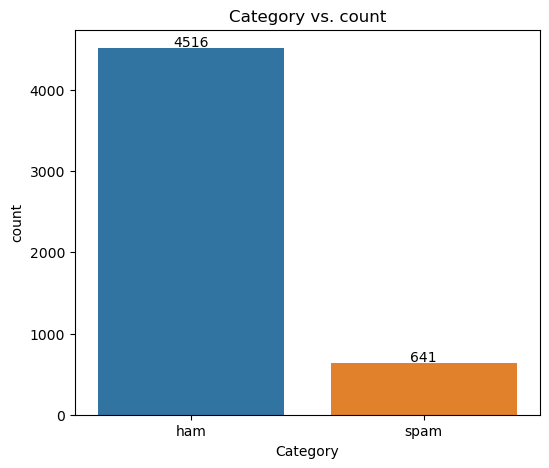

In [9]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(df["Category"].value_counts().reset_index(), x="Category", y="count")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 4), 
                   textcoords = 'offset points')

plt.title("Category vs. count")
plt.show()

In [10]:
df.loc[df['Category'] == 'spam', 'Category'] = 0
df.loc[df['Category'] == 'ham', 'Category'] = 1

In [11]:
X = df['Message']
y = df['Category']

In [12]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
Name: Message, dtype: object

In [13]:
y.head()

0    1
1    1
3    1
4    1
5    0
Name: Category, dtype: object

## Importing train_test_split from Sklearn 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

In [15]:
X_train.head()

1957       K...k:)why cant you come here and search job:)
3736                       It‘s £6 to get in, is that ok?
480     When're you guys getting back? G said you were...
5206          I will reach ur home in  &lt;#&gt;  minutes
3519                Are you willing to go for apps class.
Name: Message, dtype: object

In [16]:
X_test.head()

533                     Gudnite....tc...practice going on
2737            Really? I crashed out cuddled on my sofa.
3132    LookAtMe!: Thanks for your purchase of a video...
4198    FREE for 1st week! No1 Nokia tone 4 ur mob eve...
923     It shall be fine. I have avalarr now. Will hol...
Name: Message, dtype: object

In [17]:
y_train.head()

1957    1
3736    1
480     1
5206    1
3519    1
Name: Category, dtype: object

In [18]:
y_test.head()

533     1
2737    1
3132    0
4198    0
923     1
Name: Category, dtype: object

## Importing TfidVectorizer from sklearn.feature_extraction 

we are importing TfidVectorizer from sklearn.feature_extraction it converts a collection of text documents into a matrix of TF-IDF features, which can then be used as input for machine learning algorithms like classification, clustering, or regression.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1,stop_words = 'english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [20]:
X_train_features

<4125x7454 sparse matrix of type '<class 'numpy.float64'>'
	with 31609 stored elements in Compressed Sparse Row format>

In [21]:
X_test_features

<1032x7454 sparse matrix of type '<class 'numpy.float64'>'
	with 6804 stored elements in Compressed Sparse Row format>

In [22]:
y_train.head()

1957    1
3736    1
480     1
5206    1
3519    1
Name: Category, dtype: int32

In [23]:
y_test.head()

533     1
2737    1
3132    0
4198    0
923     1
Name: Category, dtype: int32

## Importing Linear Regression and Checking the Accuracy of the model on the trained data 

In [24]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

In [25]:
model_1.fit(X_train_features, y_train)

LinearRegression()

In [26]:
model_1.score(X_test_features, y_test)

0.7581738052169493

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_pred_model_1 = model_1.predict(X_train_features)
y_pred_model_1

array([ 9.96932317e-01,  9.99571361e-01,  1.00000052e+00, ...,
       -2.19335970e-07,  1.00000043e+00,  9.99999971e-01])

In [29]:
a = model_1.score(X_test_features, y_test)

## Importing Logistic Regression and Checking the Accuracy 

In [30]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()

In [31]:
model_2.fit(X_train_features, y_train)

LogisticRegression()

In [32]:
model_2.score(X_test_features, y_test)

0.9583333333333334

In [33]:
X_train_features.shape

(4125, 7454)

In [34]:
b = model_2.score(X_test_features, y_test)

## Importing Decision Tree and checking the accuracy

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier(random_state = 0)

In [36]:
model_3.fit(X_train_features, y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
model_3.score(X_test_features, y_test)

0.9496124031007752

In [38]:
c = model_3.score(X_test_features, y_test)

## Importing Random Forest and checking the accuracy 

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [40]:
model_4.fit(X_train_features, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [41]:
model_4.score(X_test_features, y_test)

0.9699612403100775

In [42]:
d = model_4.score(X_test_features, y_test)

## Importing Support Vector Machine and checking the accuracy 

In [43]:
from sklearn.svm import SVC
model_5 = SVC()

In [44]:
model_5.fit(X_train_features, y_train)

SVC()

In [45]:
model_5.score(X_test_features, y_test)

0.9718992248062015

In [46]:
e = model_5.score(X_test_features, y_test)

## Importing K-Nearest Neighbors and checking the accuracy 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model_6 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [48]:
model_6.fit(X_train_features, y_train)

KNeighborsClassifier()

In [49]:
model_6.score(X_test_features, y_test)

0.9031007751937985

In [50]:
f = model_6.score(X_test_features, y_test)

## Checking All the accuracies together 

In [51]:
print("The Accuracy of Linear Regression is : ",a)
print("The Accuracy of Logistic Regression is : ",b)
print("The Accuracy of Decision Tree : ",c)
print("The Accuracy of Random Forest : ",d)
print("The Accuracy of Support Vector Machine is : ",e)
print("The Accuracy of K-Nearest Neighbors is : ",f)

The Accuracy of Linear Regression is :  0.7581738052169493
The Accuracy of Logistic Regression is :  0.9583333333333334
The Accuracy of Decision Tree :  0.9496124031007752
The Accuracy of Random Forest :  0.9699612403100775
The Accuracy of Support Vector Machine is :  0.9718992248062015
The Accuracy of K-Nearest Neighbors is :  0.9031007751937985


AS WE CAN SEE THAT SUPPORT VECTOR MACHINE HAS THE HIGHEST ACCURACY SO WE ARE GOING TO TAKE SUPPORT VECTOR MACHINE INTO THE CONSIDERATION

## Checking our model on a random email text  

CHECKING THE MODEL ON A EMAIL TEXT TO SEE WHETHER THE MODEL PREDICTS THE CORRECT RESULT OR NOT WHICH WE HAVE BUILT USING SUPPORT VECTOR MACHINE 

In [52]:
#we are giving a spam mail text in the input_your_mail section

input_your_mail = ["Congratulations! You've won a free vacation to Hawaii! Click here to claim your prize now!"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model_4.predict(input_data_features)
prediction
if(prediction[0] == 1):
    print("It is a Non Spam Mail")
else:
    print("It is a Spam Mail")

It is a Spam Mail


In [53]:
#we are giving another spam mail text to see the results

input_your_mail = ["Claim your prize! You're the lucky winner of our monthly raffle. Click here to claim your reward."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model_5.predict(input_data_features)
prediction
if(prediction[0] == 1):
    print("It is a Non Spam Mail")
else:
    print("It is a Spam Mail")

It is a Spam Mail


In [54]:
# we are giving a non spam mail to see the results

input_your_mail = ["Update: We've made improvements to our website based on your feedback. Check out the new features and enhancements to enhance your browsing experience. We value your input and strive to provide the best service possible."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model_5.predict(input_data_features)
prediction
if(prediction[0] == 1):
    print("It is a Non Spam Mail")
else:
    print("It is a Spam Mail")

It is a Non Spam Mail


## As we can see that the model is working perfectly fine Now we can make some GUI using Tkinter Module


In [58]:
import tkinter as tk
from tkinter import messagebox
def classify_email():
    input_text = input_from_user.get("1.0", "end-1c")  # Get text from Text widget
    input_data_features = feature_extraction.transform([input_text])
    prediction = model_4.predict(input_data_features)
    if prediction[0] == 1:
        result = "Non Spam"
    else:
        result = "Spam"
    messagebox.showinfo("Classification Result", f"This email is {result}")
root = tk.Tk() #main window
root.title("Email Spam Classification")
input_from_user = tk.Text(root, height=10, width=50) #text widget
input_from_user.pack(pady=10)
classify_button = tk.Button(root, text="Classify Email", command=classify_email) #created button
classify_button.pack()
root.mainloop()